In [1]:
import pandas as pd
import numpy as np

https://chat.openai.com/share/11bc30d3-8c9b-42c4-af10-cbc7567e9b4c

In [2]:
sco_books = pd.read_csv('SCoData_books_v1.2_2022_01.csv', encoding='utf-8', dtype={'year': 'Int32'})
sco_books.sample(5)

,uri,title,author,editor,translator,introduction,illustrator,photographer,year,format,uncertain,ebook_url,volumes_issues,notes,event_count,borrow_count,purchase_count,circulation_years,updated
5309,https://shakespeareandco.princeton.edu/books/a...,[Adrienne Monnier in front of Shakespeare and ...,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,Photograph,False,NaN,NaN,NaN,1,0,0,1958,2020-06-03T18:21:50+00:00
440,https://shakespeareandco.princeton.edu/books/b...,The Professor with the Brontë Poems,"Brontë, Charlotte;Brontë, Emily;Brontë, Anne;B...",NaN,NaN,NaN,NaN,NaN,1889,Book,False,https://archive.org/details/professorandpoem03...,NaN,NaN,1,0,1,1939,2020-07-06T12:35:24+00:00
897,https://shakespeareandco.princeton.edu/books/c...,Chaucer and His England,"Coulton, G. G.",NaN,NaN,NaN,NaN,NaN,1908,Book,False,https://archive.org/details/chaucerhisenglan00...,NaN,NaN,1,1,0,1936,2021-04-16T01:39:15+00:00
1644,https://shakespeareandco.princeton.edu/books/b...,Our Women: Chapters on the Sex-Discord,"Bennett, Arnold",NaN,NaN,NaN,NaN,NaN,1920,Book,False,https://archive.org/details/ourwomenchapters00...,NaN,NaN,1,1,0,1921,2021-01-27T20:02:53+00:00
5013,https://shakespeareandco.princeton.edu/books/v...,New York Detective,"Van Wagner, Ernest L.",NaN,NaN,NaN,NaN,NaN,1938,Book,False,NaN,NaN,NaN,3,3,0,1938,2020-04-30T19:40:20+00:00


In [3]:
ban_books = pd.read_csv('banned_books.csv', encoding='utf-8', dtype={'date_banned': 'Int32'})
ban_books.sample(5)

,title,author,country,date_banned,source,note
7,Wonder Stories,"Andersen, Hans Christian",USA,1954,https://babel.hathitrust.org/cgi/pt?id=mdp.390...,NaN
85,The Grapes of Wrath,"Steinbeck, John",USA,1939,https://babel.hathitrust.org/cgi/pt?id=mdp.390...,Burned in St.Louis
73,Brave New World,"Huxley, Aldous",Ireland,1932,https://babel.hathitrust.org/cgi/pt?id=mdp.390...,NaN
189,Time and Western Man,"Lewis, Wyndham",NaN,<NA>,NaN,NaN
29,Man and Superman,"Shaw, George Bernard",USA,1905,https://babel.hathitrust.org/cgi/pt?id=mdp.390...,New York Public Library withdrew the work


In [4]:
ban_books.columns

Index(['title', 'author', 'country', 'date_banned', 'source', 'note'], dtype='object')

In [5]:
ban_books.shape

(208, 6)

In [6]:
ban_books_aut = ban_books[['author']]
ban_books_aut.rename(columns={'author':'ban_author'}, inplace=True)
ban_books_aut

C:\Users\dittm\AppData\Local\Temp\ipykernel_7060\3768331347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ban_books_aut.rename(columns={'author':'ban_author'}, inplace=True)


,ban_author
0,Aristophanes
1,Ovid
2,"Apuleius, Lucius"
3,"Shakespeare, William"
4,"Defoe, Daniel"
...,...
203,"Bowman, Isa"
204,"Romanov, Panteleimon"
205,"Lofting, Hugh"
206,"Faulkner, William"


In [7]:
ban_books_aut_unique = ban_books_aut.drop_duplicates()
ban_books_aut_unique.sample(10)

,ban_author
143,"Linklater, Eric"
123,"Rabelais, François"
26,"Maupassant, Guy de"
121,"Franklin, Benjamin"
98,"Goodman, Daniel Carson"
171,"Walpole, Hugh"
153,"Harris, Frank"
133,"Zweig, Stefan"
131,"Allen, Hervey"
183,NaN


In [8]:
ban_books_aut_unique.shape

(137, 1)

In [9]:
sco_books_aut = sco_books[sco_books['format'] == 'Book'][['author', 'title', 'format']].dropna()
sco_books_aut.rename(columns={'author':'sco_author'}, inplace=True)
sco_books_aut.shape

(5278, 3)

In [10]:
sco_books_aut.columns

Index(['sco_author', 'title', 'format'], dtype='object')

In [11]:
sco_books_aut.sample(10)

,sco_author,title,format
989,"Bennett, Arnold",Helen with the High Hand,Book
102,"Irving, Washington",The Alhambra,Book
457,"James, Henry",The Tragic Muse,Book
2131,"De la Mare, Walter",The Riddle,Book
4739,"Lyons, Eugene",Assignment in Utopia,Book
1784,"Sabatini, Rafael",Scaramouche,Book
4914,"De la Roche, Mazo",The Very House,Book
3365,"Birmingham, George A.",The Major's Candlesticks,Book
3372,"Chamson, André",The Road,Book
3762,"Henderson, Archibald",Bernard Shaw: Playboy and Prophet,Book


check how many books per author are in the dataset

In [12]:
sco_filter = sco_books_aut.loc[sco_books_aut['sco_author'] == 'Hemingway, Ernest']
sco_filter

,sco_author,title,format
2140,"Hemingway, Ernest",Three Stories and Ten Poems,Book
2731,"Hemingway, Ernest",The Sun Also Rises,Book
2735,"Hemingway, Ernest",The Torrents of Spring,Book
2826,"Hemingway, Ernest",Men without Women,Book
3216,"Hemingway, Ernest",A Farewell to Arms,Book
3780,"Hemingway, Ernest",Death in the Afternoon,Book
4160,"Hemingway, Ernest",Winner Take Nothing,Book
4418,"Hemingway, Ernest",Green Hills of Africa,Book
4927,"Hemingway, Ernest",To Have and Have Not,Book
5061,"Hemingway, Ernest",The Fifth Column and the First Forty-Nine Stories,Book


In [13]:
merged_df = pd.merge(ban_books_aut_unique, sco_books_aut, how='inner', left_on='ban_author', right_on='sco_author')

intersection_df = merged_df[~(merged_df['ban_author'].isna() | merged_df['sco_author'].isna())]
intersection_df.reset_index(drop=True, inplace=True)

intersection_df = intersection_df[['sco_author', 'ban_author']]

intersection_df.shape

(912, 2)

In [14]:
intersection_df.head(10)

,sco_author,ban_author
0,Aristophanes,Aristophanes
1,"Shakespeare, William","Shakespeare, William"
2,"Shakespeare, William","Shakespeare, William"
3,"Shakespeare, William","Shakespeare, William"
4,"Shakespeare, William","Shakespeare, William"
5,"Shakespeare, William","Shakespeare, William"
6,"Shakespeare, William","Shakespeare, William"
7,"Shakespeare, William","Shakespeare, William"
8,"Shakespeare, William","Shakespeare, William"
9,"Shakespeare, William","Shakespeare, William"


In [15]:
duplicate_counts = intersection_df.groupby(['sco_author', 'ban_author']).size()

sorted_duplicate_counts = duplicate_counts.sort_values(ascending=False)

top_15_duplicates = sorted_duplicate_counts.head(15)

top_15_duplicates


sco_author               ban_author             
Wells, H. G.             Wells, H. G.               46
Lawrence, D. H.          Lawrence, D. H.            41
Walpole, Hugh            Walpole, Hugh              35
Shaw, George Bernard     Shaw, George Bernard       31
Huxley, Aldous           Huxley, Aldous             26
Kipling, Rudyard         Kipling, Rudyard           26
Hardy, Thomas            Hardy, Thomas              25
Maugham, W. Somerset     Maugham, W. Somerset       25
Moore, George            Moore, George              24
Eliot, T. S.             Eliot, T. S.               22
Stevenson, Robert Louis  Stevenson, Robert Louis    20
Ellis, Havelock          Ellis, Havelock            19
Shakespeare, William     Shakespeare, William       19
Woolf, Virginia          Woolf, Virginia            18
Dreiser, Theodore        Dreiser, Theodore          17
dtype: int64

In [16]:
total_books = sco_books_aut.groupby(['sco_author']).size()

sorted_total_books = total_books.sort_values(ascending=False)

top_15_total_duplicates = sorted_total_books.head(15)

top_15_total_duplicates


sco_author
Wells, H. G.             46
Bennett, Arnold          42
Lawrence, D. H.          41
Walpole, Hugh            35
James, Henry             35
Galsworthy, John         33
Chesterton, G. K.        33
Shaw, George Bernard     31
Mackenzie, Compton       28
Yeats, William Butler    28
Kipling, Rudyard         26
Huxley, Aldous           26
Maugham, W. Somerset     25
Hardy, Thomas            25
Moore, George            24
dtype: int64

Ratio of banned authors within the first dataset: 0.17279272451686245


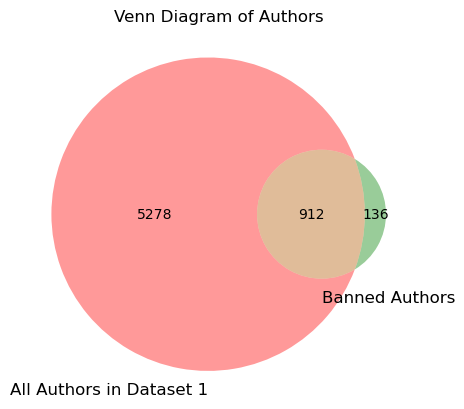

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

# Count occurrences of each author in both datasets
sco_authors_count = sco_books_aut['sco_author'].value_counts()
ban_authors_count = ban_books_aut_unique['ban_author'].value_counts()

# Find authors whose works were banned within the first dataset
banned_authors_in_dataset1 = set(sco_authors_count.index).intersection(set(ban_authors_count.index))

# Calculate the total count of authors in dataset 1
total_authors_in_dataset1 = sum(sco_authors_count)

# Calculate the total count of banned authors in dataset 1
total_banned_authors_in_dataset1 = sum(sco_authors_count[author] for author in banned_authors_in_dataset1)

# Calculate the ratio of banned authors within the first dataset
ratio_banned_authors = total_banned_authors_in_dataset1 / total_authors_in_dataset1

# Print the ratio
print("Ratio of banned authors within the first dataset:", ratio_banned_authors)

# Create a Venn diagram
venn2(subsets=(total_authors_in_dataset1, len(ban_authors_count), total_banned_authors_in_dataset1), 
      set_labels=('All Authors in Dataset 1', 'Banned Authors'))

# Show the plot
plt.title('Venn Diagram of Authors')
plt.show()

https://chat.openai.com/share/55aadf66-952c-4677-bf37-763fc9caf0ab